In [4]:
import yfinance as stonk
import numpy as numpy
import pandas
import matplotlib.pyplot as plt
from threading import Thread
from multiprocessing import Process

import csv
  
  

class inputstock:
    def __init__(self,stock):
        self.stock = stock ##Input Stock
        self.stockinfo = stonk.Ticker(self.stock) ##Yahoo finance stock
        self.hist_52_weeks = self.stockinfo.history(period="260d")
        self.hist_260_days = self.stockinfo.history(period="260d")
        self.Open = numpy.array(self.hist_52_weeks['Open']) ##OPENINGS FROM YAHOO FINANCE
        self.Close = numpy.array(self.hist_52_weeks['Close'])
        self.High = numpy.array(self.hist_52_weeks['High'])
        self.Low = numpy.array(self.hist_52_weeks['Low'])

        ##for the year
        self.Open_daily =  numpy.array(self.hist_260_days['Open']) ##OPENINGS FROM YAHOO FINANCE
        self.Close_daily = numpy.array(self.hist_260_days['Close'])
        self.High_daily = numpy.array(self.hist_260_days['High'])
        self.Low_daily = numpy.array(self.hist_260_days['Low'])
        self.daily_average = (numpy.average(self.Open_daily) + numpy.average(self.Close_daily) + numpy.average(self.High_daily) + numpy.average(self.Low_daily))/4
        
        


        
                



        
        
    

    def show(self):
        sum_1 = 0;
        sum_2 = 0;
        sum_3 = 0;
        global_maximum = self.hist_260_days['High'].sort_values()
        global_minimum = self.hist_260_days['Low'].sort_values()
        average_open = numpy.average(numpy.array(self.hist_260_days['Open']))
        average_close = numpy.average(numpy.array(self.hist_260_days['Close']))
        


        for i in range(len(self.hist_260_days['Open'])):
                sum_1 += self.hist_260_days['Open'][i]
        for i in range(len(self.hist_260_days['Close'])):
                sum_2 += self.hist_260_days['Close'][i]
        cumulative_average = self.daily_average;

        
        #print(self.hist_260_days['Open'])
        #print(self.hist_260_days['Close'])
        #print(self.hist_260_days['High'])
        #print(self.hist_260_days['Low'])
        Open = numpy.array(self.hist_260_days['Open'])
        Close = numpy.array(self.hist_260_days['Close'])
        High = numpy.array(self.hist_260_days['High'])
        Low = numpy.array(self.hist_260_days['Low'])
        quarterly_data = self.stockinfo.history(period="91d")
        average_daily = []
        for i in range(91):
                average_daily.append((quarterly_data['Close'][i] + quarterly_data['Open'][i] + quarterly_data['High'][i] + quarterly_data['Low'][i]))

       
        for i in range(91):
                sum_3 += (quarterly_data['Close'][i] - quarterly_data['Open'][i])/(average_daily[i])

                

        ##print(Open,Close,High,Low)
        ##x = (numpy.average(Open)+numpy.average(Close)+numpy.average(High)+numpy.average(Low))
        ##print(x/4)
        
        t1 = global_maximum[0]/global_minimum[0]
        t2 = average_close/average_open
        t3 = (average_close-average_open)/cumulative_average
        t4 = global_maximum[0]/cumulative_average
        t5 = global_minimum[0]/cumulative_average

        Ratios_ = [self.stock,t1,t2,t3,t4,t5]
#-------------------------------------------------------------------------------

       ## print(self.stock+"\n")
       ## print("Variables")
       ## print("Cumulative Average", cumulative_average)
       ## print("Global Max", global_maximum)
       ## print("Global Min", global_minimum)
       ## print("Average Open", average_open)
       ## print("Average Close",average_close)
       ## print("\n")
        
       ## print("Ratios")
       ## print("Global Max / Global Min =",t1)
       ## print("Average Close / Average Open =",t2)
       ## print("(Average Close - Average Open) / Cumulative Average =",t3)
       ## print("Global Max / Cumulative Average =",t4)
       ## print("Global Min / Cumulative Average =",t5)
       ## print("Updated sum ",sum_1/260)
       ## print("Updated sum ",sum_2/260)
       ## print("Updated Sum",sum_3/91)
       ## print(self.daily_average)
        return Ratios_
        
        
    
#-------------------------------------------------------------------------------
        #print(average_max)
        #print(average_min)
        #print(average_open)
        #print(average_close)
        #print("STANDARD DEV AVG HI")
       #print("STANDARD DEV AVG LOW")
        #print(self.daily_average)

StonkSymbol = inputstock("AA")

StonkSymbol.show()



Russel2000_Tickers = pandas.read_csv('russel_2000.csv')

##print(Russel2000_Tickers)

dataframe = Russel2000_Tickers["AA"]
##print(type(dataframe))


##len(dataframe)




Russel2000_Tickers = pandas.read_csv('russel_2000.csv')

##print(Russel2000_Tickers)

dataframe = Russel2000_Tickers["AA"]
##print(type(dataframe))


len(dataframe)


list = ["AAPL","TSLA","CRM","GE","F","GOOGL","FB","SNAP","AMD","NVDA","ABT","MMM","A","ALB","ALG","BBY","BLK","BA","C","CSCO","KO","AMZN","COST","CBS","FANG","DTE","EQIX","GM","HAL","HPQ","JPM","KEY","LNT","MRO","MGM","MSFT","NSLX","NKE","OXY","PEP","QCOM","RSG","ROL","STE","TXT","TSN","ULTA","VISC","V","WMT","ZION"]
##list = ["AAPL","TSLA","GE","F"]




##plt.plot([1,2,3,4])
##plt.ylabel('some numbers')
##plt.show()


##print(list)
ratio_list = []
for i in range(len(dataframe)):
        if dataframe[i] not in list:
                list.append(dataframe[i])




ranges = []
a = int(len(list)/15)
for i in range(16):
        ranges.append(i*a)

print(ranges)
        
Batches = []

def Create_Batches():
        steps = 1
        while(steps<15):
                BatchCreate = []
                for i in range(ranges[steps-1],ranges[steps]):
                        BatchCreate.append(list[i])
                
                Batches.append(BatchCreate)
                steps +=1
                
Create_Batches() ##Creates our Batches



        

def First_Batch():
        for i in range(len(Batches[0])):
                try:
                        stocksymbol = inputstock(str(Batches[0][i]))
                        g = stocksymbol.show()
                        ratio_list.append(g)
                except IndexError:
                        continue


def Second_Batch():
        for i in range(len(Batches[11])):
                try:
                        stocksymbol = inputstock(str(Batches[1][i]))
                        g = stocksymbol.show()
                        ratio_list.append(g)
                except IndexError:
                        continue



def Third_Batch():
        for i in range(len(Batches[11])):
                try:
                        stocksymbol = inputstock(str(Batches[2][i]))
                        g = stocksymbol.show()
                        ratio_list.append(g)
                except IndexError:
                        continue



def Fourth_Batch():
        for i in range(len(Batches[11])):
                try:
                        stocksymbol = inputstock(str(Batches[3][i]))
                        g = stocksymbol.show()
                        ratio_list.append(g)
                except IndexError:
                        continue


def Fifth_Batch():
        for i in range(len(Batches[11])):
                try:
                        stocksymbol = inputstock(str(Batches[4][i]))
                        g = stocksymbol.show()
                        ratio_list.append(g)
                except IndexError:
                        continue



def Sixth_Batch():
        for i in range(len(Batches[11])):
                try:
                        stocksymbol = inputstock(str(Batches[5][i]))
                        g = stocksymbol.show()
                        ratio_list.append(g)
                except IndexError:
                        continue



def Seventh_Batch():
        for i in range(len(Batches[11])):
                try:
                        stocksymbol = inputstock(str(Batches[6][i]))
                        g = stocksymbol.show()
                        ratio_list.append(g)
                except IndexError:
                        continue




def Eieght_Batch():
        for i in range(len(Batches[7])):
                try:
                        stocksymbol = inputstock(str(Batches[7][i]))
                        g = stocksymbol.show()
                        ratio_list.append(g)
                except IndexError:
                        continue
                except TypeError:
                        continue


def Ninth_Batch():
        for i in range(len(Batches[8])):
                try:
                        stocksymbol = inputstock(str(Batches[8][i]))
                        g = stocksymbol.show()
                        ratio_list.append(g)
                except IndexError:
                        continue
                except TypeError:
                        continue



def Tenth_Batch():
        for i in range(len(Batches[9])):
                try:
                        stocksymbol = inputstock(str(Batches[9][i]))
                        g = stocksymbol.show()
                        ratio_list.append(g)
                except IndexError:
                        continue
                except TypeError:
                        continue


def Eleventh_Batch():
        for i in range(len(Batches[10])):
                try:
                        stocksymbol = inputstock(str(Batches[10][i]))
                        g = stocksymbol.show()
                        ratio_list.append(g)
                except IndexError:
                        continue
                except TypeError:
                        continue


def Twelfth_Batch():
        for i in range(len(Batches[11])):
                try:
                        stocksymbol = inputstock(str(Batches[11][i]))
                        g = stocksymbol.show()
                        ratio_list.append(g)
                except IndexError:
                        continue
                except TypeError:
                        continue



def Thirtheenth_Batch():
        for i in range(len(Batches[12])):
                try:
                        stocksymbol = inputstock(str(Batches[12][i]))
                        g = stocksymbol.show()
                        ratio_list.append(g)
                except IndexError:
                        continue
                except TypeError:
                        continue



def Fourtheenth_Batch():
        for i in range(len(Batches[13])):
                try:
                        stocksymbol = inputstock(str(Batches[13][i]))
                        g = stocksymbol.show()
                        ratio_list.append(g)
                except IndexError:
                        continue
                except TypeError:
                        continue
                except ValueError:
                        continue

'''
def Fiftheenth_Batch():
        for i in range(len(Batches[14])):
                try:
                        stocksymbol = inputstock(str(Batches[14][i]))
                        g = stocksymbol.show()
                        ratio_list.append(str(g))
                except IndexError:
                        continue
                except TypeError:
                        continue

len(Batches[13])

'''
'''    
for i in range(len(list)):
        try:
                stocksymbol = inputstock(list[i])
                g = stocksymbol.show()
                ratio_list.append(g)
        except IndexError:
                continue



'''


'''
x = ratio_list
num_bins = 5
n, bins, patches = plt.hist(x, num_bins, facecolor='blue', alpha=0.5)
plt.show()
'''


#print(g)



'''
Process(target=First_Batch).start()
Process(target=Second_Batch).start()
Process(target=Third_Batch).start()
Process(target=Fourth_Batch).start()
Process(target=Fifth_Batch).start()
Process(target=Sixth_Batch).start()
Process(target=Seventh_Batch).start()
Process(target=Eieght_Batch).start()
Process(target=Ninth_Batch).start()
Process(target=Tenth_Batch).start()
Process(target=Eleventh_Batch).start()
Process(target=Twelfth_Batch).start()
Process(target=Thirtheenth_Batch).start()
Process(target=Fourtheenth_Batch).start()
Process(target=Fiftheenth_Batch).start()


'''








First_Batch()
Second_Batch()
Third_Batch()
Fourth_Batch()
Fifth_Batch()
Sixth_Batch()
Seventh_Batch()
Eieght_Batch()
Ninth_Batch()
Tenth_Batch()
Eleventh_Batch()
Twelfth_Batch()
Thirtheenth_Batch()
Fourtheenth_Batch()
##Fiftheenth_Batch()






# field names 
fields = ['Ratios'] 
    
# data rows of csv file 
rows = ['1','2','3','4','5'] 
  



[0, 139, 278, 417, 556, 695, 834, 973, 1112, 1251, 1390, 1529, 1668, 1807, 1946, 2085]
- CBS: No data found, symbol may be delisted
- CBS: No data found, symbol may be delisted
- CBS: No data found, symbol may be delisted
/usr/local/lib/python3.8/dist-packages/numpy/lib/function_base.py:380: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/usr/local/lib/python3.8/dist-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
- NSLX: No data found, symbol may be delisted
- NSLX: No data found, symbol may be delisted
- NSLX: No data found, symbol may be delisted
/usr/local/lib/python3.8/dist-packages/numpy/lib/function_base.py:380: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/usr/local/lib/python3.8/dist-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
- VISC: No data found for this date range, symbol may 

In [19]:
with open('output.csv','wb') as result_file:
    wr = csv.writer(result_file, dialect='excel')
    wr.writerow(ratio_list)

-0.0011089794552937128


In [20]:
print(float(ratio_list[1]))

In [22]:
ratio_list_final = []

In [24]:
with open('output.csv','wb') as result_file:
    wr = csv.writer(result_file, dialect='excel')
    wr.writerow(ratio_list_final)

In [ ]:
# Open File
resultFyle = open("output.csv",'w')

# Write data to file
for r in ratio_list:
    resultFyle.write(str(r) + ",")
resultFyle.close()

In [2]:
print(ratio_list)


NameError: name 'ratio_list' is not defined

In [3]:
print(ratio_list[1][0])

TSLA


In [8]:
Ticker_Names = []
First_Ratio = []
Second_Ratio = []
Third_Ratio = []
Fourth_Ratio = []
Fifth_Ratio = []

for i in range(len(ratio_list)):
    Ticker_Names.append(ratio_list[i][0])
    First_Ratio.append(ratio_list[i][1])
    Second_Ratio.append(ratio_list[i][2])
    Third_Ratio.append(ratio_list[i][3])
    Fourth_Ratio.append(ratio_list[i][4])
    Fifth_Ratio.append(ratio_list[i][5])

Ticker_Dictionary = {
    'Ticker_Names' : Ticker_Names,
    'First_Ratio' : First_Ratio,
    'Second_Ratio' : Second_Ratio,
    'Third_Ratio' : Third_Ratio,
    'Fourth_Ratio' : Fourth_Ratio,
    'Fifth_Ratio' : Fifth_Ratio
}
    

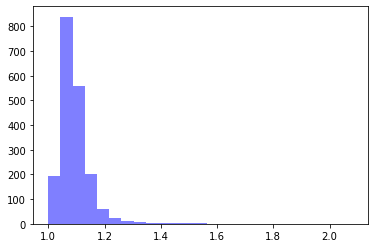

In [9]:
x = First_Ratio
num_bins = 25
n, bins, patches = plt.hist(x, num_bins, facecolor='blue', alpha=0.5)
plt.show()

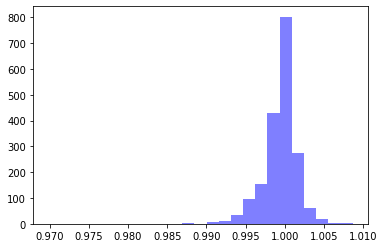

In [10]:
x = Second_Ratio
num_bins = 25
n, bins, patches = plt.hist(x, num_bins, facecolor='blue', alpha=0.5)
plt.show()

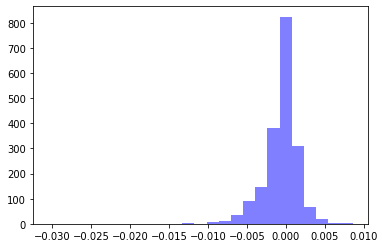

In [11]:
x = Third_Ratio
num_bins = 25
n, bins, patches = plt.hist(x, num_bins, facecolor='blue', alpha=0.5)
plt.show()

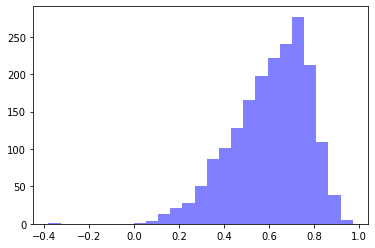

In [12]:
x = Fourth_Ratio
num_bins = 25
n, bins, patches = plt.hist(x, num_bins, facecolor='blue', alpha=0.5)
plt.show()

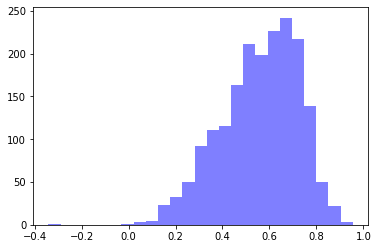

In [13]:
x = Fifth_Ratio
num_bins = 25
n, bins, patches = plt.hist(x, num_bins, facecolor='blue', alpha=0.5)
plt.show()

In [17]:
print(ratio_list[1])

['TSLA', 1.1072132473909828, 1.0004136477282402, 0.0004140296301412565, 0.22208258328552993, 0.20057796798298907]


In [18]:
with open('protagonist.csv', 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerows(ratio_list)